In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [33]:
forest_data=pd.read_csv("forestfires.csv")
pd.set_option('display.max_columns',None)
forest_data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small


In [3]:
forest_data.shape

(517, 31)

In [4]:
forest_data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [ ]:
#there is no null variables

In [5]:
forest_data.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [ ]:
#forest data includes int,float and object

In [6]:
forest_data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
forest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FFMC           517 non-null    float64
 1   DMC            517 non-null    float64
 2   DC             517 non-null    float64
 3   ISI            517 non-null    float64
 4   temp           517 non-null    float64
 5   RH             517 non-null    int64  
 6   wind           517 non-null    float64
 7   rain           517 non-null    float64
 8   area           517 non-null    float64
 9   dayfri         517 non-null    int64  
 10  daymon         517 non-null    int64  
 11  daysat         517 non-null    int64  
 12  daysun         517 non-null    int64  
 13  daythu         517 non-null    int64  
 14  daytue         517 non-null    int64  
 15  daywed         517 non-null    int64  
 16  monthapr       517 non-null    int64  
 17  monthaug       517 non-null    int64  
 18  monthdec  

In [98]:
#Data Analysis of the data according to mean of the columns
dc=pd.pivot_table(data=forest_data,values=['FFMC','DMC','DC','ISI','temp','RH','wind','rain','area'],index='month',aggfunc=['mean'])
dc

mean                                                          \
               DC         DMC       FFMC        ISI         RH       area   
month                                                                       
apr     48.555556   15.911111  85.788889   5.377778  46.888889   8.891111   
aug    641.077717  153.732609  92.336957  11.072283  45.489130  12.489076   
dec    351.244444   26.122222  84.966667   3.466667  38.444444  13.330000   
feb     54.670000    9.475000  82.905000   3.350000  55.700000   6.275000   
jan     90.350000    2.400000  50.400000   1.450000  89.000000   0.000000   
jul    450.603125  110.387500  91.328125   9.393750  45.125000  14.369687   
jun    297.705882   93.382353  89.429412  11.776471  45.117647   5.841176   
mar     75.942593   34.542593  89.444444   7.107407  40.000000   4.356667   
may     93.750000   26.700000  87.350000   4.600000  67.000000  19.240000   
nov    106.700000    3.000000  79.500000   1.100000  31.000000   0.000000   
oct    681.673333   41.420000  90.453333   7.146667  37.466667   6.638000   
sep    734.615698  120.922674  91.243023   8.577326  42.843023  17.942616   

                                      
           rain       temp      wind  
month                                 
apr    0.000000  12.044444  4.666667  
aug    0.058696  21.631522  4.086413  
dec    0.000000   4.522222  7.644444  
feb    0.000000   9.635000  3.755000  
jan    0.000000   5.250000  2.000000  
jul    0.006250  22.109375  3.734375  
jun    0.000000  20.494118  4.135294  
mar    0.003704  13.083333  4.968519  
may    0.000000  14.650000  4.450000  
nov    0.000000  11.800000  4.500000  
oct    0.000000  17.093333  3.460000  
sep    0.000000  19.612209  3.557558

In [105]:
dc[('mean','rain')].sort_values(ascending=False).head()

month
aug    0.058696
jul    0.006250
mar    0.003704
apr    0.000000
dec    0.000000
Name: (mean, rain), dtype: float64

In [106]:
dc[('mean','temp')].sort_values(ascending=False).head()

month
jul    22.109375
aug    21.631522
jun    20.494118
sep    19.612209
oct    17.093333
Name: (mean, temp), dtype: float64

In [107]:
dc[('mean','wind')].sort_values(ascending=False).head()

month
dec    7.644444
mar    4.968519
apr    4.666667
nov    4.500000
may    4.450000
Name: (mean, wind), dtype: float64

In [108]:
dc[('mean','RH')].sort_values(ascending=False).head()

month
jan    89.000000
may    67.000000
feb    55.700000
apr    46.888889
aug    45.489130
Name: (mean, RH), dtype: float64

In [109]:
dc[('mean','DC')].sort_values(ascending=False).head()

month
sep    734.615698
oct    681.673333
aug    641.077717
jul    450.603125
dec    351.244444
Name: (mean, DC), dtype: float64

In [110]:
dc[('mean','DMC')].sort_values(ascending=False).head()

month
aug    153.732609
sep    120.922674
jul    110.387500
jun     93.382353
oct     41.420000
Name: (mean, DMC), dtype: float64

In [111]:
dc[('mean','FFMC')].sort_values(ascending=False).head()

month
aug    92.336957
jul    91.328125
sep    91.243023
oct    90.453333
mar    89.444444
Name: (mean, FFMC), dtype: float64

In [112]:
dc[('mean','ISI')].sort_values(ascending=False).head()

month
jun    11.776471
aug    11.072283
jul     9.393750
sep     8.577326
oct     7.146667
Name: (mean, ISI), dtype: float64

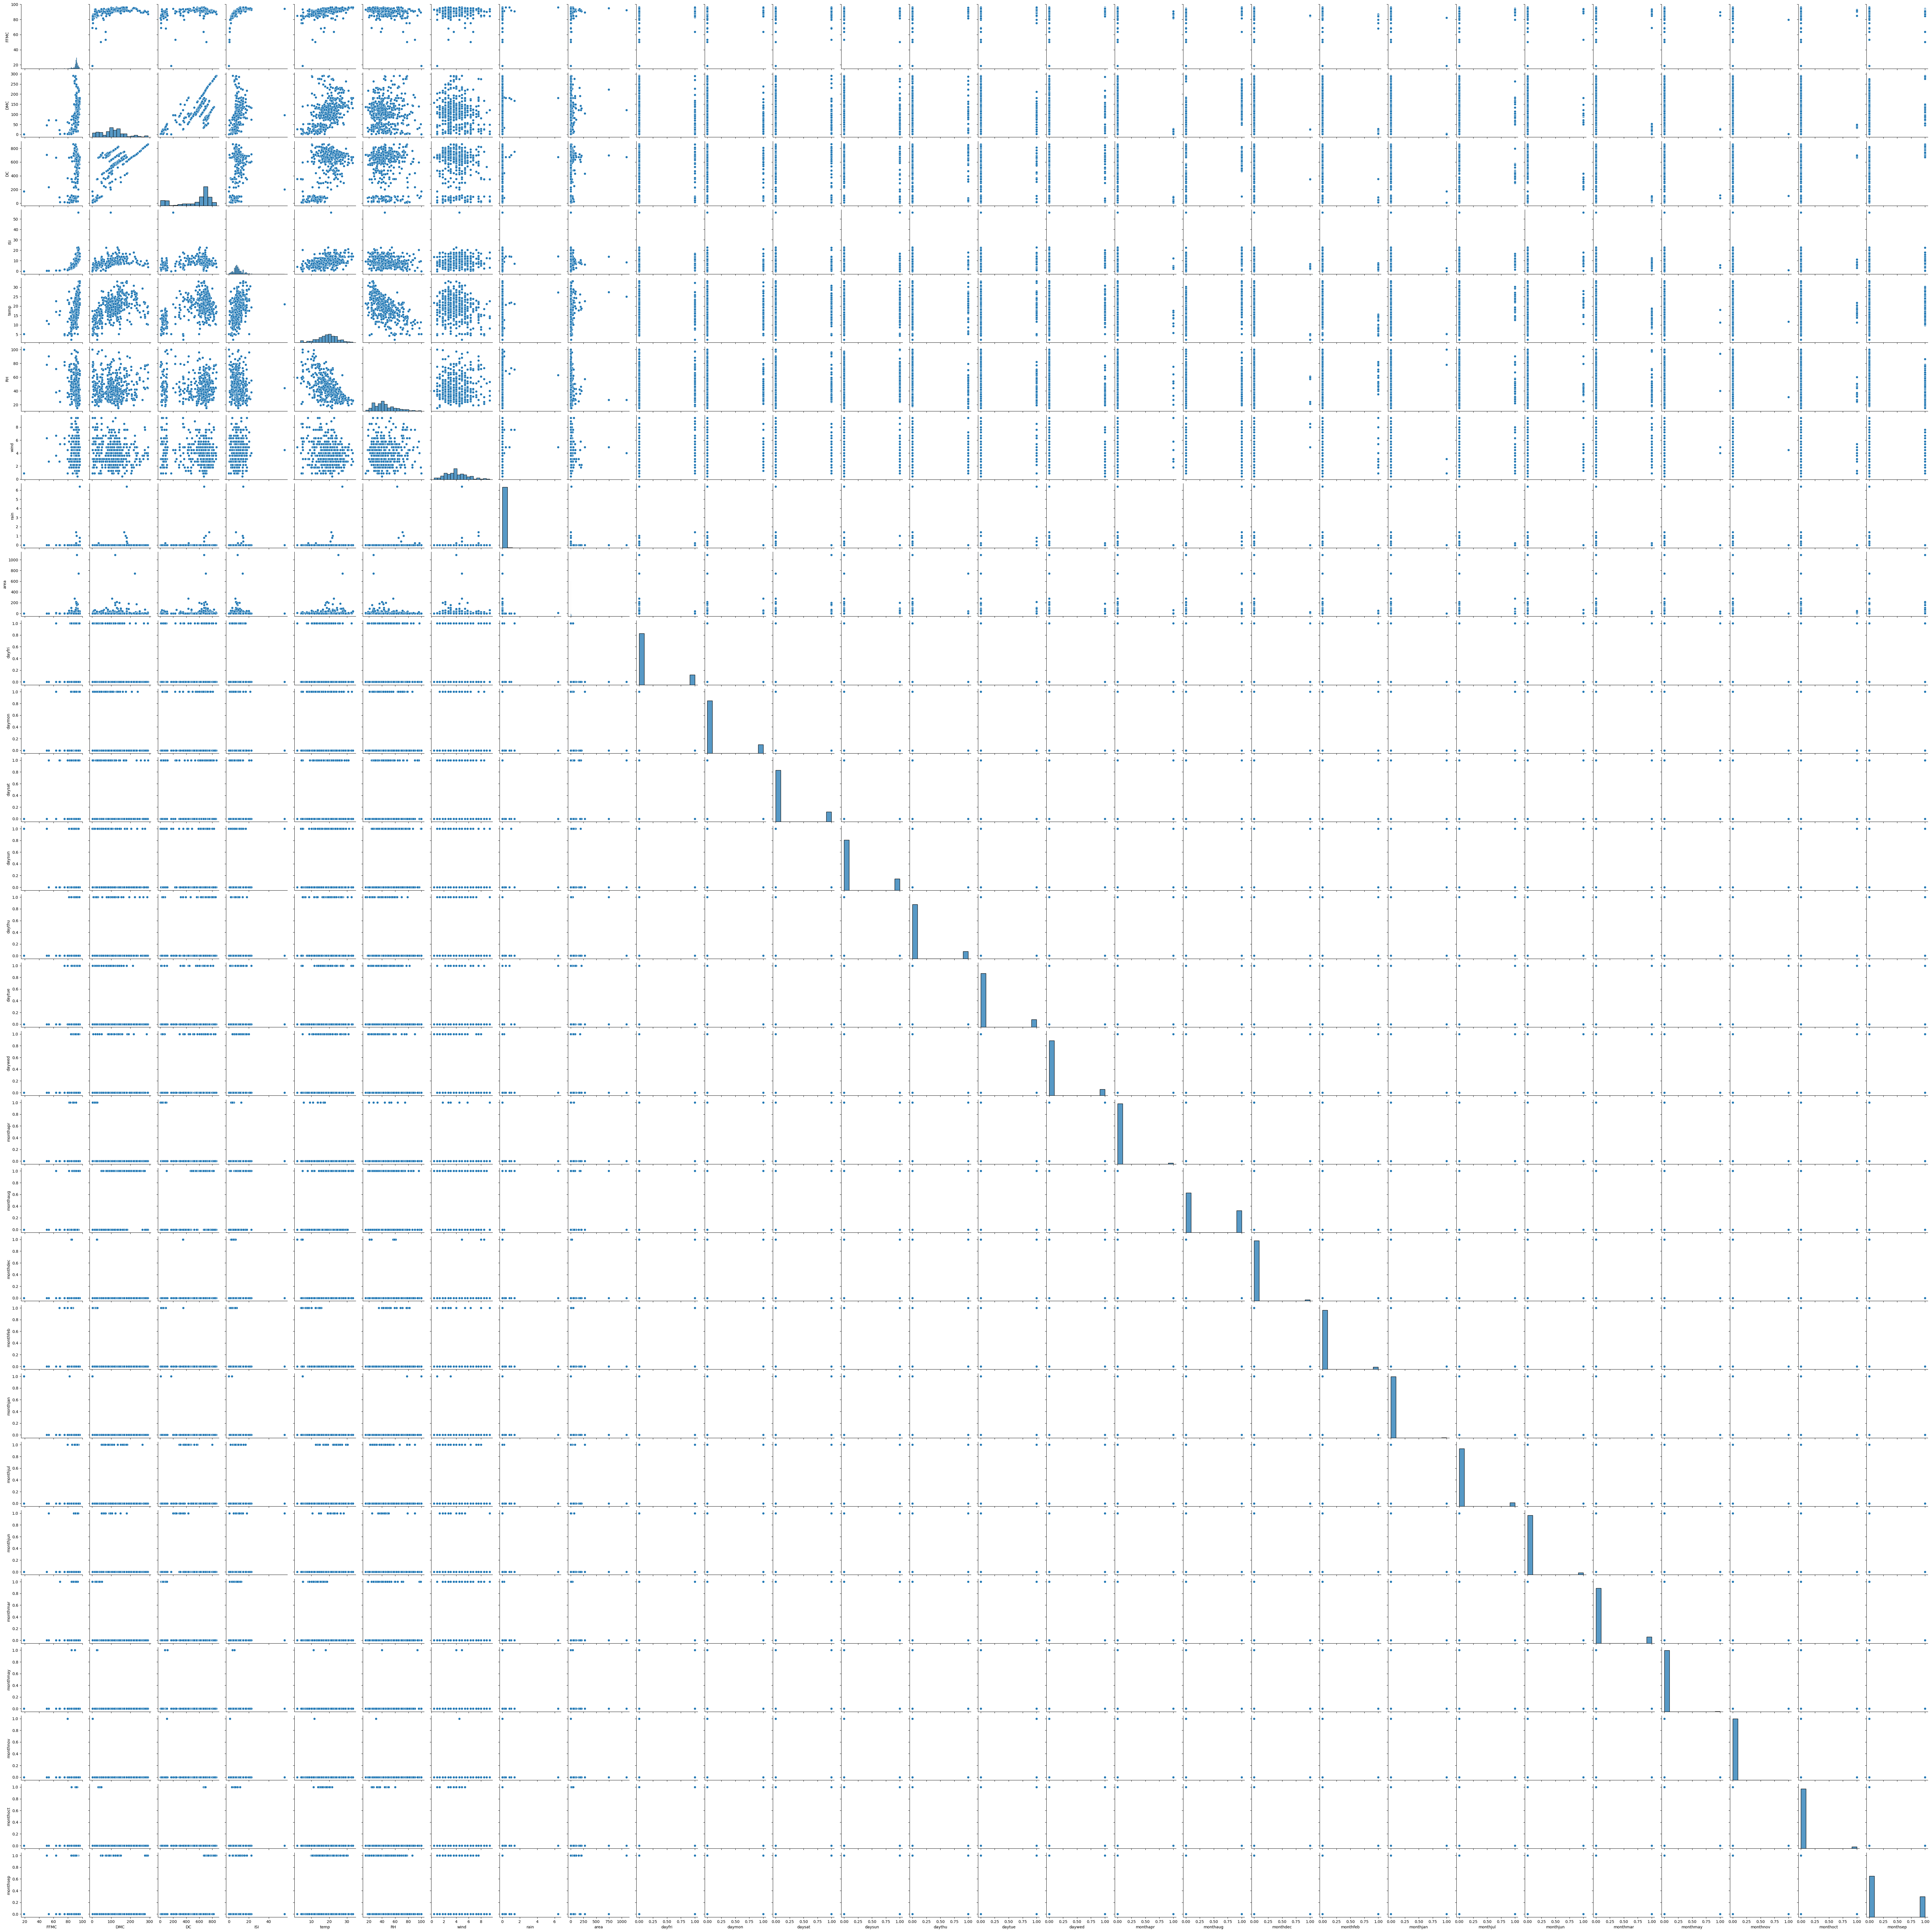

In [7]:
sns.pairplot(forest_data)
plt.show()

In [82]:
cat_columns=['month','day','size_category']

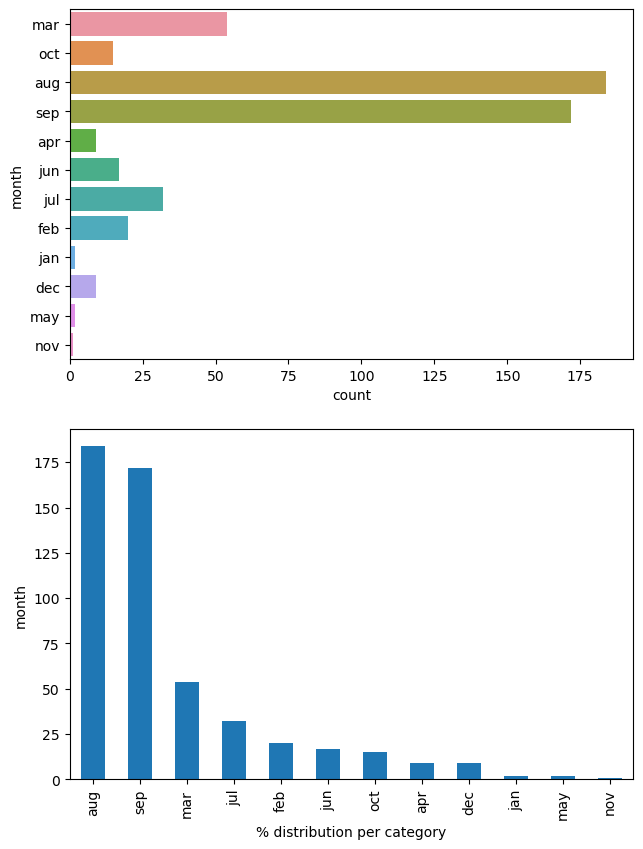

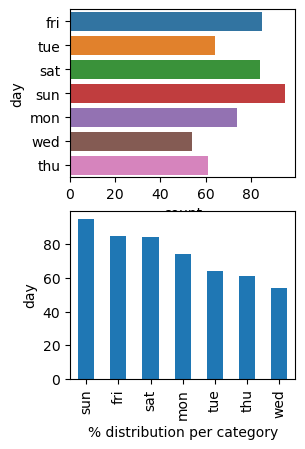

ValueError: num must be an integer with 1 <= num <= 4, not 5

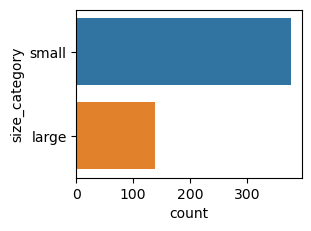

In [94]:
plt.figure(figsize=(16,10))
for i,col in enumerate(cat_columns,1):
    plt.subplot(2,2,i)
    sns.countplot(data=forest_data,y=col)
    plt.subplot(2,2,i+2)
    forest_data[col].value_counts().plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
    plt.show()

#High Number of the forest fires happens in the month of August and September.

#Analysis of Forest fire Damage of different Months and Days.

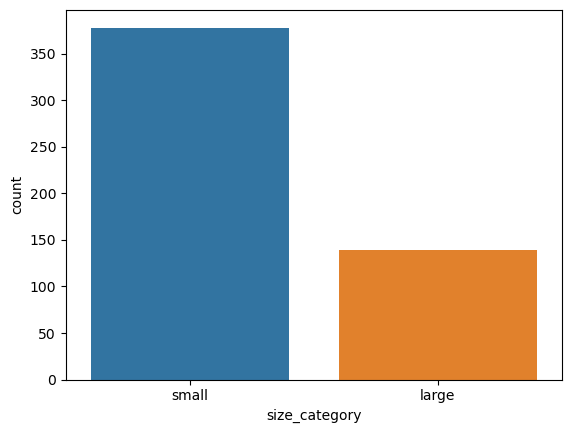

In [9]:
sns.countplot(x=forest_data['size_category'])
plt.show()

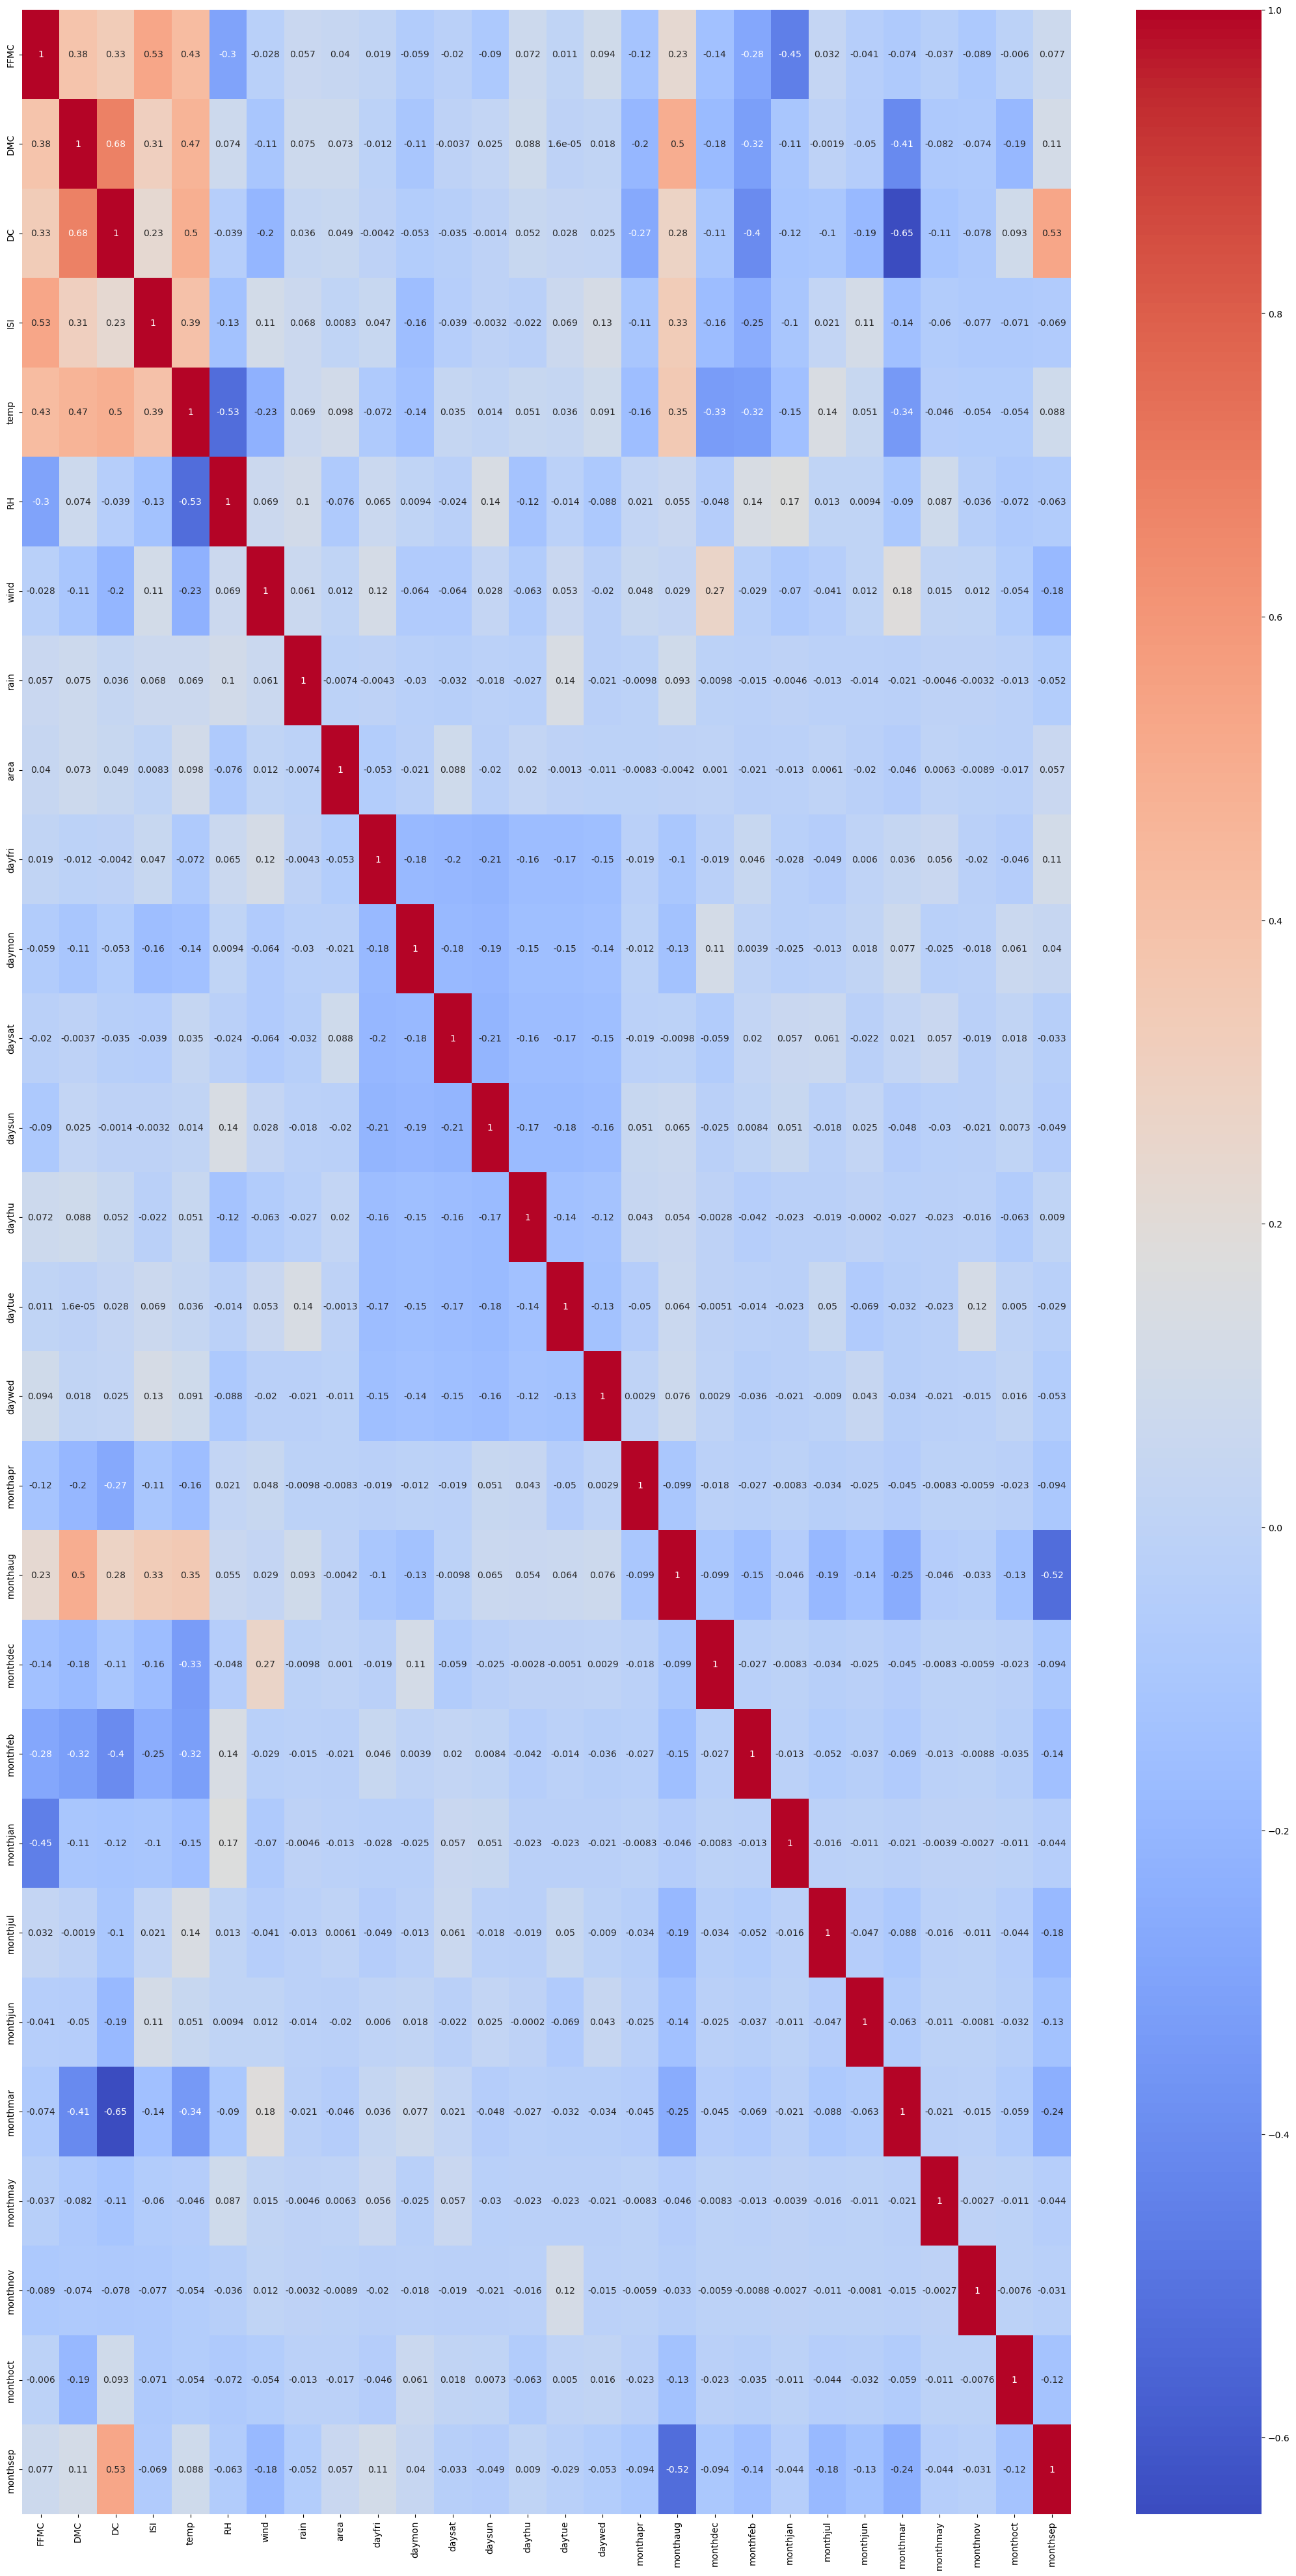

In [10]:
corr=forest_data.corr()
plt.figure(figsize=(26,50))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

### pei chart

In [95]:
area_burnt=forest_data[forest_data['area']>0]
area_burnt

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
138,jul,tue,85.8,48.3,313.4,3.9,18.0,42,2.7,0.0,0.36,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,small
139,sep,tue,91.0,129.5,692.6,7.0,21.7,38,2.2,0.0,0.43,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,small
140,sep,mon,90.9,126.5,686.5,7.0,21.9,39,1.8,0.0,0.47,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,small
141,aug,wed,95.5,99.9,513.3,13.2,23.3,31,4.5,0.0,0.55,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,small
142,aug,fri,90.1,108.0,529.8,12.5,21.2,51,8.9,0.0,0.61,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,aug,fri,91.0,166.9,752.6,7.1,21.1,71,7.6,1.4,2.17,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small
510,aug,fri,91.0,166.9,752.6,7.1,18.2,62,5.4,0.0,0.43,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large


<Axes: title={'center': 'monthly analysis of burned area'}, ylabel='area'>

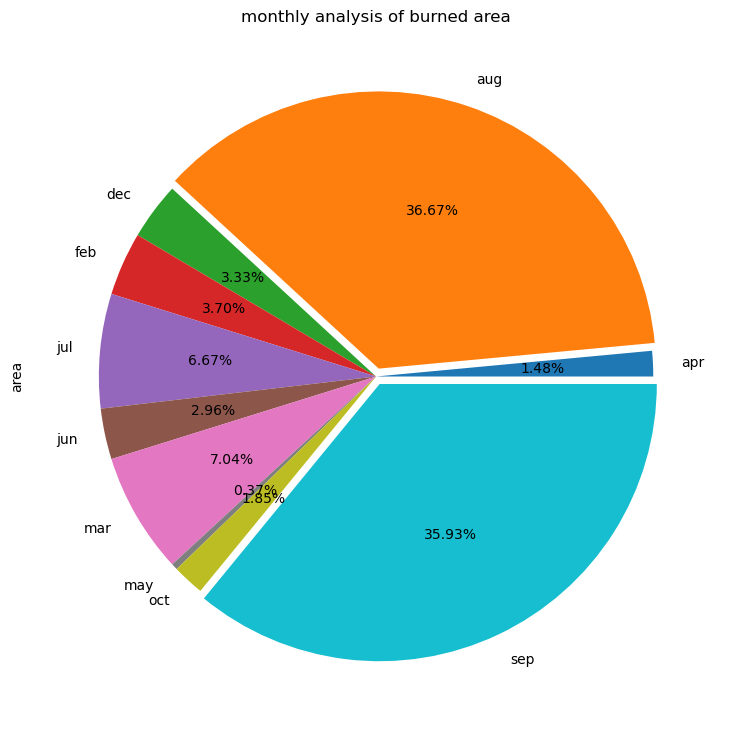

In [96]:
area_burnt.groupby("month")['area'].agg('count').plot(kind='pie',title='monthly analysis of burned area',figsize=(9,9),explode=[0.0,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.03,],autopct='%.2f%%')

#Higher number of forest fire occurs in august and september.

In [ ]:
#label encoding the data

In [11]:
le_encoder=LabelEncoder()
forest_data['size_category']=le_encoder.fit_transform(forest_data['size_category'])
forest_data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,0
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,0
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [12]:
forest_data=forest_data.drop("month",axis=1)
forest_data=forest_data.drop('day',axis=1)
forest_data

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1


In [13]:
x=forest_data.drop('size_category',axis=1)
y=forest_data[["size_category"]]


In [14]:
# stantadizing data
s_scaler=StandardScaler()
x_scaled=s_scaler.fit_transform(x)
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)


In [15]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=.20,random_state=25)

In [16]:
x_train.shape,y_train.shape

((413, 28), (413, 1))

In [17]:
x_test.shape,y_test.shape

((104, 28), (104, 1))

In [18]:
linear_model=SVC(kernel='linear')
linear_model.fit(x_train,y_train)

SVC(kernel='linear')

In [19]:
y_pred=linear_model.predict(x_test)

In [80]:
print('Accuracy score:' ,accuracy_score(y_test,y_pred))
print('confusion metrics:\n',confusion_matrix(y_test,y_pred))

Accuracy score: 0.9038461538461539
confusion metrics:
 [[21 10]
 [ 0 73]]


In [21]:
#using rbf
rbf_model=SVC(kernel='rbf',random_state=40,gamma=0.1,C=1.0)
rbf_model.fit(x_train,y_train)


SVC(gamma=0.1, random_state=40)

In [22]:
y_pred2=rbf_model.predict(x_test)

In [79]:
print('Accuracy score:' ,accuracy_score(y_test,y_pred2))
print('confusion metrics:\n',confusion_matrix(y_test,y_pred2))

Accuracy score: 0.7403846153846154
confusion metrics:
 [[ 9 22]
 [ 5 68]]


In [24]:
poly_model=SVC(kernel='poly',random_state=40,gamma=0.1,C=1.0)
poly_model.fit(x_train,y_train)


SVC(gamma=0.1, kernel='poly', random_state=40)

In [25]:
y_pred3=poly_model.predict(x_test)

In [26]:
print('Accuracy score:' ,accuracy_score(y_test,y_pred3))
print('classification report:',classification_report(y_test,y_pred3))
print('confusion metrics:\n',confusion_matrix(y_test,y_pred3))

Accuracy score: 0.7596153846153846
classification report:               precision    recall  f1-score   support

           0       0.65      0.42      0.51        31
           1       0.79      0.90      0.84        73

    accuracy                           0.76       104
   macro avg       0.72      0.66      0.68       104
weighted avg       0.75      0.76      0.74       104

confusion metrics:
 [[13 18]
 [ 7 66]]


### SVM with GrisSearchCV

In [97]:
svc_model=SVC()
param_grid={'kernel':['linear','poly','rbf','sigoid'],'gamma':['0.1',1,'scale','auto']}
grid=GridSearchCV(svc_model,param_grid,cv=5)
grid.fit(x_train,y_train)
print('Best params:',grid.best_params_,'\n''Best score:',grid.best_score_)
print('Best estimator:',grid.best_estimator_)

Best params: {'gamma': 1, 'kernel': 'linear'} 
Best score: 0.8886864531295915
Best estimator: SVC(gamma=1, kernel='linear')
